In [1]:
import tensorflow as tf

In [2]:
DATA_DIR = "/hiragana"
IMG_SIZE = (64,64)
BATCH_SIZE = 32

In [11]:
# create datasets

train = tf.keras.utils.image_dataset_from_directory(
    directory="hiragana",
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)
validation = tf.keras.utils.image_dataset_from_directory(
    "hiragana",
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 4600 files belonging to 46 classes.
Using 3680 files for training.
Found 4600 files belonging to 46 classes.
Using 920 files for validation.


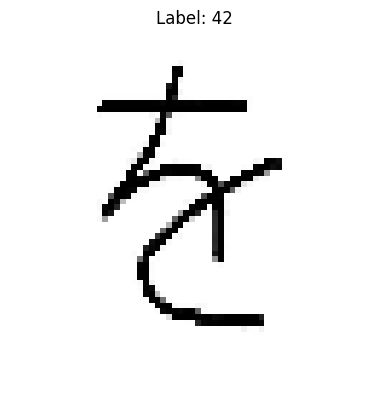

In [ ]:
# Sample plotting test of data

import matplotlib.pyplot as plt
for images, labels in train.take(1):
    first_image = images[0].numpy().astype("uint8")
    first_label = labels[0].numpy()
    break

plt.imshow(first_image, cmap="gray")
plt.title(f"Label: {first_label}")
plt.axis("off")
plt.show()

In [ ]:
# Create the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(train.class_names))
])


In [17]:
# Compile and fit model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.fit(train, validation_data=validation, epochs=10)

Epoch 1/10


ValueError: Invalid dtype: TrackedList